# Neural Network 

### Measurements
<img src="images/measurement2.png">

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# each point is length, width, type (0, 1)

data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5,  1,  1],
        [1,    1,  0]]

mystery_flower = [4.5, 1]

In [4]:
#function for sigmoid activation

def sigmoid(x):
    return 1/(1+np.exp(-x))

#sigmoid prime
def sigmoid_p(x): 
    return sigmoid(x)* ( 1 - sigmoid(x))

<img src="images/latex.png">

In [5]:
T = np.linspace( -5,5,50) # from -5 to 5 with 50 subdivisions
sigmoid(T) #it can be observed that sigmoid converts all T to between( 0 and 1)

array([0.00669285, 0.00819568, 0.01003256, 0.01227603, 0.01501357,
       0.01835024, 0.0224116 , 0.02734679, 0.03333169, 0.04057176,
       0.04930426, 0.05979915, 0.07235796, 0.0873094 , 0.10500059,
       0.12578244, 0.14998817, 0.17790412, 0.20973382, 0.24555731,
       0.28529068, 0.32865255, 0.37514569, 0.42406149, 0.47451191,
       0.52548809, 0.57593851, 0.62485431, 0.67134745, 0.71470932,
       0.75444269, 0.79026618, 0.82209588, 0.85001183, 0.87421756,
       0.89499941, 0.9126906 , 0.92764204, 0.94020085, 0.95069574,
       0.95942824, 0.96666831, 0.97265321, 0.9775884 , 0.98164976,
       0.98498643, 0.98772397, 0.98996744, 0.99180432, 0.99330715])

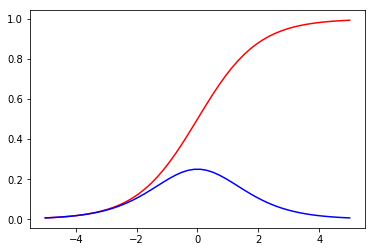

In [6]:
plt.plot(T,sigmoid(T),c='r')
plt.plot(T,sigmoid_p(T),c='b');

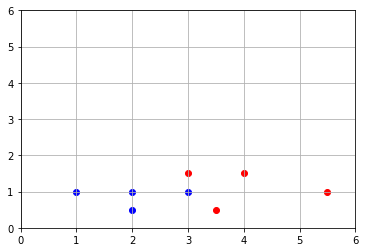

In [7]:
plt.axis([0,6,0,6]) #Xmin, Xmax, Ymin, Ymax
plt.grid() #grid lines

#plot our data points before training
for i in range(len(data)):
    point=data[i]
    color='r'
    if point[2]==0:
        color='b'
    plt.scatter(point[0],point[1],c=color);

<img src="images/measurement3.png">

In [8]:
#training loop




def train():
    
    #randomly assigns w1,w2,b
    
    w1= np.random.randn() #weight 1
    w2= np.random.randn() #weight 2
    b = np.random.randn() #bias
    
    iterations = 10000
    learning_rate = 0.1
    costs = [] # keep costs during training, see if they go down

    for i in range(iterations):
        #get a randon point
        ri= np.random.randint(len(data))
        point=data[ri] #bootstrap 100x from the original data
        
        z= w1*point[0] + w2*point[1] + b
        pred = sigmoid(z) #activate z
    
        target = point[2] #third element of the list
        
        # cost for current random point
        cost = ( pred-target ) **2
        
    # print the cost over all data points every 1k iters
        if i % 100 == 0:
            c = 0
            for j in range(len(data)):
                p = data[j]
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
                c += np.square(p_pred - p[2])
            costs.append(c)

        #backpropagation
        dcost_pred = 2 * ( pred - target) *(1) #differentiate cost= ( pred-target ) **2
        dpred_dz = sigmoid_p(z) 
    
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1

        dcost_dw1 = dcost_pred * dpred_dz * dz_dw1
        dcost_dw2 = dcost_pred * dpred_dz * dz_dw2
        dcost_db  = dcost_pred * dpred_dz * dz_db

        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b =  b  - learning_rate * dcost_db

    return costs,w1,w2,b



In [13]:
w2

0.9504090700228081

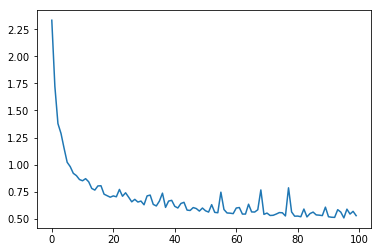

In [9]:
costs, w1, w2, b = train()

fig = plt.plot(costs)

In [10]:
#predict mystery flower

mystery_flower = [4.5, 1]
z= w1*mystery_flower[0] + w2*mystery_flower[1] + b
pred = sigmoid(z) 
print(pred)
print("close to 0 -> blue, close to 1 -> red")

0.9884439676568634
close to 0 -> blue, close to 1 -> red
